In [2]:
import torch

In [3]:
data=open('Names.txt','r').read().splitlines()

In [4]:
vocab=sorted(list(set(''.join(data))))

In [5]:
N=torch.zeros((len(vocab)+1,len(vocab)+1),dtype=torch.int32)

In [6]:
stoi={s:i+1 for i,s in enumerate(vocab)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}

In [7]:
for name in data:
    char=['.']+list(name)+['.']
    for char1,char2 in zip(char , char[1:]):
        pos1=stoi[char1]
        pos2=stoi[char2]
        N[pos1,pos2]+=1

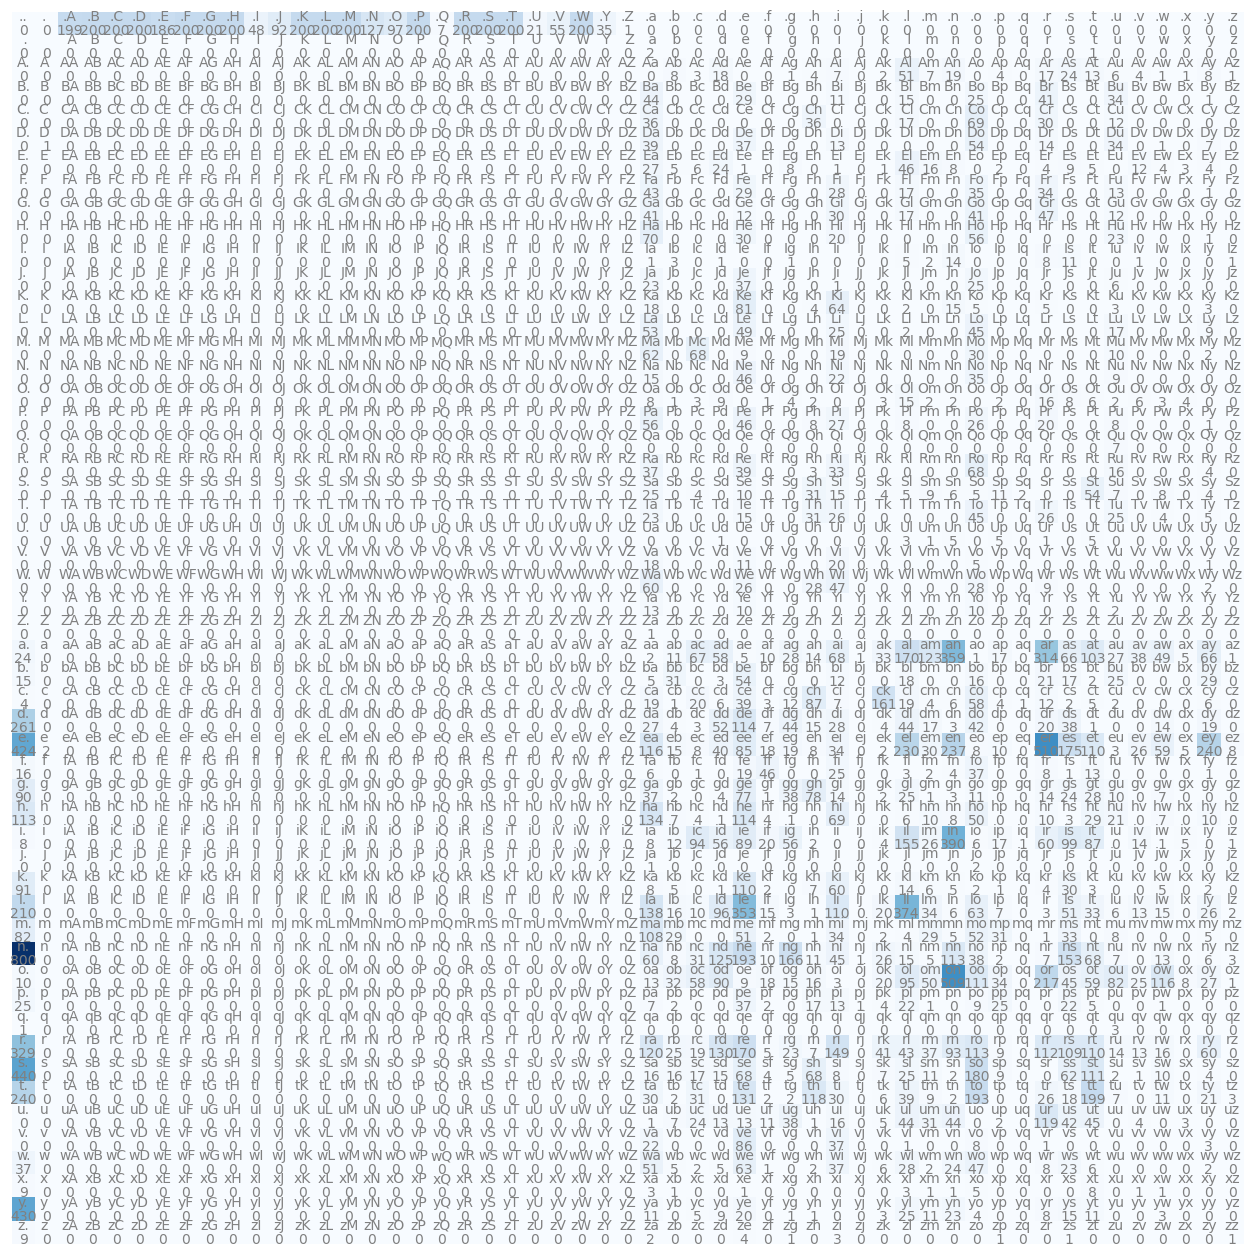

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(53):
    for j in range(53):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [86]:
P = (N+(1/len(vocab))).float()
P /= P.sum(1, keepdims=True)

In [87]:
generator=torch.Generator().manual_seed(12345678)
for i in range(4):
    out=[]
    ix=torch.tensor(0)
    while True:
        p=P[ix.item()]
        ix=torch.multinomial(p,num_samples=1,replacement=True,generator=generator)
        out.append(itos[ix.item()])
        if ix==0:
            break
    print(''.join(out))
    

Clinord.
Fan.
Rorarsodwlas.
Mickerrillodheeheers.


In [89]:
for name in data[:1]:
    char=['.']+list(name)+['.']
    for char1,char2 in zip(char , char[1:]):
        pos1=stoi[char1]
        pos2=stoi[char2]
        print(f'  sequence  | prob ')
        print('  -----------------------')
        print(f'  {char1}{char2}        | {P[pos1,pos2]}')
        print('  -----------------------')

  sequence  | prob 
  -----------------------
  .A        | 0.05424317717552185
  -----------------------
  sequence  | prob 
  -----------------------
  Ab        | 0.04009229689836502
  -----------------------
  sequence  | prob 
  -----------------------
  bb        | 0.12456560134887695
  -----------------------
  sequence  | prob 
  -----------------------
  ba        | 0.020155997946858406
  -----------------------
  sequence  | prob 
  -----------------------
  as        | 0.03974622115492821
  -----------------------
  sequence  | prob 
  -----------------------
  s.        | 0.4066649079322815
  -----------------------


In [90]:
log_likelihood=0.0
n=0
for name in data:
    char=['.']+list(name)+['.']
    for char1,char2 in zip(char , char[1:]):
        pos1=stoi[char1]
        pos2=stoi[char2]
        log=torch.log(P[pos1,pos2])
        log_likelihood+=log
        n+=1
        

In [91]:
nll=-log_likelihood/n

In [92]:
nll.item()

2.353325128555298